In [1]:
!pip install sounddevice

In [2]:
import sounddevice as sd

In [3]:
from scipy.io.wavfile import write

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [6]:
duration = 1
sample_freq = 22050

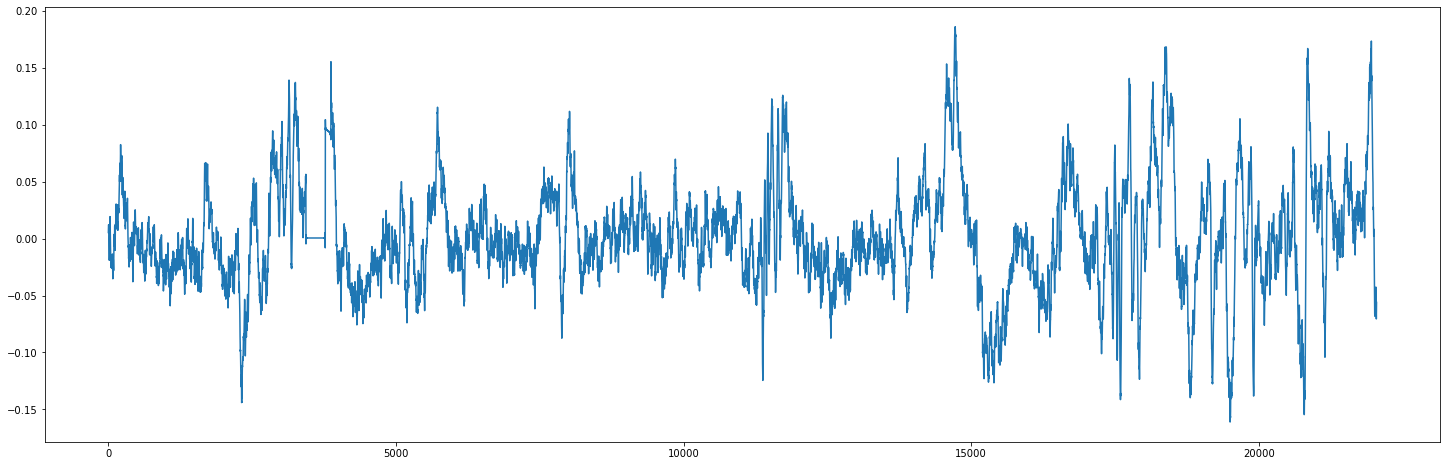

In [7]:
recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
sd.wait()
plt.figure(figsize=(25,8))
plt.plot(recording)

In [8]:
recording

array([[ 0.00537109],
       [ 0.01065063],
       [ 0.00979614],
       ...,
       [-0.06466675],
       [-0.06246948],
       [-0.05603027]], dtype=float32)

In [9]:
recording.shape

(22050, 1)

In [10]:
write('hi.wav',sample_freq,recording)

In [11]:
import IPython.display as ipd

In [12]:
ipd.Audio('hi.wav')

In [13]:
!pip install librosa

In [16]:
import librosa as alib

In [17]:
sig, rate = alib.load('hi.wav')

In [18]:
rate

22050

In [19]:
sig

array([ 0.00537109,  0.01065063,  0.00979614, ..., -0.06466675,
       -0.06246948, -0.05603027], dtype=float32)

In [20]:
sig.shape

(22050,)

In [21]:
alib.feature.rms(sig)

array([[0.02434109, 0.02525074, 0.0259915 , 0.0359198 , 0.04258576,
        0.05080158, 0.05625095, 0.05306643, 0.04805893, 0.04118335,
        0.03632681, 0.03113792, 0.03005985, 0.02824911, 0.03061819,
        0.03036337, 0.03053684, 0.02966445, 0.02059293, 0.02076191,
        0.02308705, 0.03727685, 0.03973475, 0.04244989, 0.04189453,
        0.02947226, 0.02961066, 0.05206889, 0.05935086, 0.06688669,
        0.06751702, 0.05453372, 0.04860373, 0.04778497, 0.05973095,
        0.065478  , 0.06637079, 0.07011764, 0.0583898 , 0.06046832,
        0.06015184, 0.05622467, 0.06339669, 0.05423053]], dtype=float32)

In [22]:
22050/512

43.06640625

In [23]:
#MFCC - Mel Frequency Cepstral Coefficients

In [24]:
feats = alib.feature.mfcc(sig,n_mfcc=10)
feats

array([[-2.83879272e+02, -2.87287933e+02, -2.90638306e+02,
        -2.84082794e+02, -2.81546997e+02, -2.75330292e+02,
        -2.64891296e+02, -2.40303360e+02, -2.47308624e+02,
        -2.81455719e+02, -2.78593933e+02, -2.80929199e+02,
        -2.82131378e+02, -2.85701599e+02, -2.90053864e+02,
        -2.84461761e+02, -2.81957611e+02, -2.82602997e+02,
        -2.76670502e+02, -2.80493500e+02, -2.86845459e+02,
        -2.80951752e+02, -2.58616821e+02, -2.55666092e+02,
        -2.72678070e+02, -2.80617859e+02, -2.86292542e+02,
        -2.85522400e+02, -2.85280609e+02, -2.80292145e+02,
        -2.80950806e+02, -2.88354065e+02, -2.83592529e+02,
        -2.76779877e+02, -2.65242645e+02, -2.67497803e+02,
        -2.79068939e+02, -2.74422485e+02, -2.68513092e+02,
        -2.73212341e+02, -2.68446075e+02, -2.57100281e+02,
        -2.60164612e+02, -2.62829834e+02],
       [ 1.38185257e+02,  1.37505005e+02,  1.33979156e+02,
         1.43875061e+02,  1.49122330e+02,  1.57237961e+02,
         1.48

In [25]:
feats.shape

(10, 44)

In [29]:
feats.mean(axis=1).feats = alib.feature.mfcc(sig,n_mfcc=10)
featsshape

AttributeError: 'numpy.ndarray' object has no attribute 'feats'

In [30]:
import pandas as pd

In [32]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [33]:
features = extract_features(path = 'hi.wav')

In [34]:
df = pd.DataFrame({i:[] for i in range(65)})

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64


In [36]:
len(features)

64

Live Audio Recognition

In [37]:
sample_name = '_'.join(input('enter the sample name:').split())
try:
    os.mkdir('training/{}'.format(sample_name))
except:
    pass
for i in range(6):
    print('Say:',end='')
    recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
    sd.wait()    
    write('training/{0}/{0}{1}.wav'.format(sample_name,i),sample_freq,recording)    
    print('... done')

enter the sample name: hello


Say:

FileNotFoundError: [Errno 2] No such file or directory: 'training/hello/hello0.wav'

In [38]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [39]:
feats = []
for folder in os.listdir('training'):
    if '.ipynb' not in folder:
        for file in os.listdir('training/'+folder):
            feats.append(extract_features(path='/'.join(['training',folder,file]))+[folder])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'training'

In [40]:
len(feats)

0

In [41]:
len(feats[0])

IndexError: list index out of range

In [42]:
df = pd.DataFrame(feats)
df.head()

""


In [43]:
x = df.drop(64,axis=1)
y = df[64]

KeyError: '[64] not found in axis'

In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_svc = SVC().fit(x,y)
model_svc.score(x,y)

NameError: name 'x' is not defined

In [46]:
model_knn = KNeighborsClassifier().fit(x,y)
model_knn.score(x,y)

NameError: name 'x' is not defined

In [47]:
model_legit = LogisticRegression().fit(x,y)
model_legit.score(x,y)

NameError: name 'x' is not defined

In [48]:
model_rf = RandomForestClassifier().fit(x,y)
model_rf.score(x,y)

NameError: name 'x' is not defined